## Home Regression

* Student name: **Daniel M. Smith**
* Student pace: **Full Time**
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/kc_house_data.csv')

**Columns**<br>
id - unique identified for a house<br>
date - house was sold<br>
price - is prediction target<br>
bedrooms- of Bedrooms/House<br>
bathrooms- of bathrooms/bedrooms<br>
sqft_living - footage of the home<br>
sqft_lot - footage of the lot<br>
floors - Total floors (levels) in house<br>
waterfront - House which has a view to a waterfront<br>
view - Has been viewed<br>
condition - How good the condition is ( Overall )<br>
grade - overall grade given to the housing unit, based on King County grading system<br>
sqft_above - square footage of house apart from basement<br>
sqft_basement - square footage of the basement<br>
yr_built - Built Year<br>
yr_renovated - Year when house was renovated<br>
zipcode - zip<br>
lat - Latitude coordinate<br>
long - Longitude coordinate<br>
sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors<br>


In [3]:
data.shape

(21597, 21)

In [79]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [35]:
data.head(10)

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [14]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

11% of waterfront is NaN
18% of yr_renovated is NaN
.2% of view is NaN
We will set Nan to 0.0 for Nans

**Handling Nan Values**

In [25]:
data['waterfront'] = data['waterfront'].fillna(0.0)

In [26]:
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [27]:
data['view'] = data['view'].fillna(0.0)

**Rename date column to date last sold**

In [29]:
data = data.rename(columns = {"date":"lastSoldDate"})

In [32]:
#Covers 70 zipcodes
data.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [66]:
#sqft_basement should be converted to a float64 not an object
#also has ? which should be set to 0.0


In [67]:
#replacing '?'
data['sqft_basement'] = [0.0 if value == '?' else value for value in data['sqft_basement']]

In [68]:
data.loc[data["sqft_basement"] == '?']

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [53]:
data["sqft_basement"] = pd.to_numeric(data["sqft_basement"])

Price column seems to be the price since last sold. This could be an oout of date column if it has been a long while since last sole.  We should make a 2 features, 1. age of home and 2. how many years since last sold.


In [ ]:
Sqft_living15 seems to be an average of the 15 properties around
sqft_lot15 seems to be average of 15 lots around

In [73]:
data.tail(5)

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [55]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


1000102.0

9900000000.0

The data is about houses in zipcodes around Seattle, WA.  
The dependent or response variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000. <br>
sq_ft living ranges from 370 to 13540 sf ft.  <br>
bedrooms range from 1 to 33 with a mean of 3.37 and median of 3. <br>
sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.<br>

**categorical data**<br>
zipcode-70 zipcodes<br>
grade-grade from kings county grading system 3-13<br>
condition-1 to 5 5 is best<br>
view- has been viewed 0-4<br>
waterfront- view of waterfront 0-1 being yes<br>


In [69]:
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [70]:
data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [74]:
data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [78]:
data.loc[data['sqft_living'] != (data['sqft_above'] + data['sqft_basement'])]

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,0.0,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,...,8,2780,0.0,1900,0.0,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,0.0,0.0,...,8,2220,0.0,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,...,11,3480,0.0,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,...,7,820,0.0,1946,0.0,98119,47.6454,-122.373,1420,5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,291310180,6/13/2014,379500.0,3,2.25,1410,1287,2.0,0.0,0.0,...,7,1290,0.0,2005,0.0,98027,47.5344,-122.068,1490,1435
21109,3438500250,6/23/2014,515000.0,5,3.25,2910,5027,2.0,0.0,0.0,...,8,2040,0.0,2013,0.0,98106,47.5543,-122.359,2910,5027
21210,3278600680,6/27/2014,235000.0,1,1.50,1170,1456,2.0,0.0,0.0,...,8,1070,0.0,2007,0.0,98126,47.5493,-122.372,1360,1730
21356,6169901185,5/20/2014,490000.0,5,3.50,4460,2975,3.0,0.0,2.0,...,10,3280,0.0,2015,0.0,98119,47.6313,-122.370,2490,4231


In [81]:
data['age'] = 2021 - data['yr_built']

In [82]:
data['age']

0        66
1        70
2        88
3        56
4        34
         ..
21592    12
21593     7
21594    12
21595    17
21596    13
Name: age, Length: 21597, dtype: int64

In [92]:
data.head(10)

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,yrsince_reno
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,66,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,70,30.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,88,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,56,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,34,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,20,0.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,26,0.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,58,0.0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,61,0.0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,18,0.0


In [107]:
data['yrsince_reno'] = data['age']

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,yrsince_reno
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,66,66
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,70,70
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,88,88
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,56,56
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,34,34
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,20,20
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,26,26
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,58,58
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,61,61
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,18,18


In [112]:
data['yrsince_reno'] = [(2021 - val)  if (val !=0.0) else None for val in data['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
data['yrsince_reno'] = data['yrsince_reno'].fillna(data['age'])

In [121]:
data.head(10)

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,yrsince_reno
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,66,66.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,70,30.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,88,88.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,56,56.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,34,34.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,20,20.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,26,26.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,58,58.0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,61,61.0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,18,18.0


In [122]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,yrsince_reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,50.000324,48.054869
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234,28.945393
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,6.000000,6.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,24.000000,22.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,46.000000,44.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000,67.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000,121.000000


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   lastSoldDate   21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [124]:
data.columns

Index(['id', 'lastSoldDate', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'yrsince_reno'],
      dtype='object')

In [125]:
#rearrange Columns
data = data[['id', 'lastSoldDate', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'yr_built','age','condition', 'grade', 'waterfront',
        'yr_renovated','yrsince_reno', 'sqft_above', 'sqft_basement',  'view',  'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' ]]

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   lastSoldDate   21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   yr_built       21597 non-null  int64  
 9   age            21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  waterfront     21597 non-null  float64
 13  yr_renovated   21597 non-null  float64
 14  yrsince_reno   21597 non-null  float64
 15  sqft_above     21597 non-null  int64  
 16  sqft_basement  21597 non-null  float64
 17  view           21597 non-null  float64
 18  zipcod

In [127]:
data

,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,age,...,yr_renovated,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1955,66,...,0.0,66.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,1951,70,...,1991.0,30.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,1933,88,...,0.0,88.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1965,56,...,0.0,56.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1987,34,...,0.0,34.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,2009,12,...,0.0,12.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,2014,7,...,0.0,7.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,2009,12,...,0.0,12.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,2004,17,...,0.0,17.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [128]:
data.to_csv('./data/kc_house_data_tidy.csv',encoding='utf-8')

---
---
---

In [129]:
#EDA of data

In [130]:
hddf = pd.read_csv('./data/kc_house_data_tidy.csv')

In [135]:
hddf.drop(columns='Unnamed: 0',inplace=True)

In [136]:
hddf


,id,lastSoldDate,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,age,...,yr_renovated,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1955,66,...,0.0,66.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,1951,70,...,1991.0,30.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,1933,88,...,0.0,88.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1965,56,...,0.0,56.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1987,34,...,0.0,34.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,2009,12,...,0.0,12.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,2014,7,...,0.0,7.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,2009,12,...,0.0,12.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,2004,17,...,0.0,17.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [140]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [150]:
#define feature pertinent to model
feats_df = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'age','condition', 'grade']

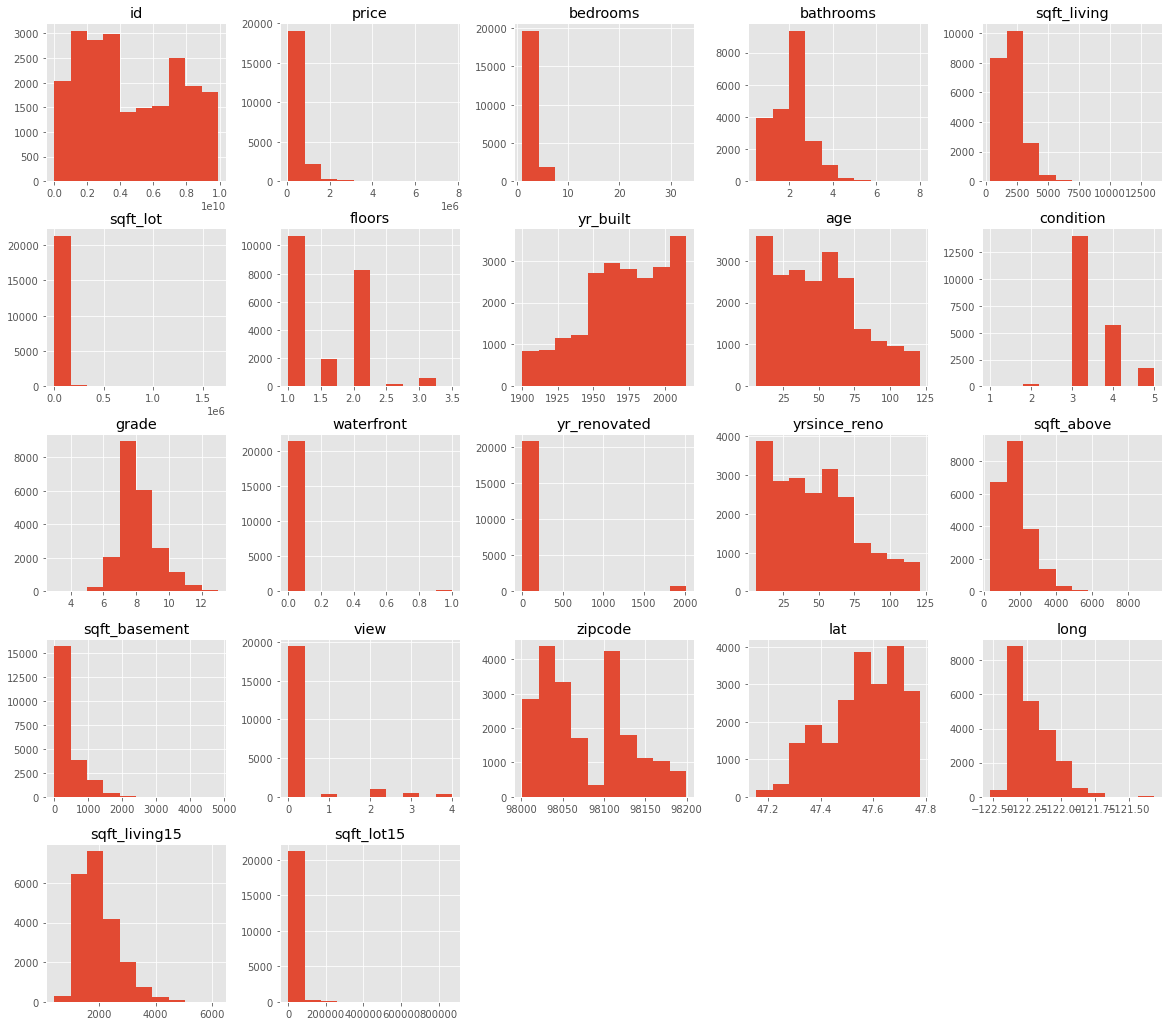

In [141]:
hddf.hist(figsize = (20,18));

Price looks to be right skewed.  We will look for linearity between different pairs of data.
## Check for Linearity

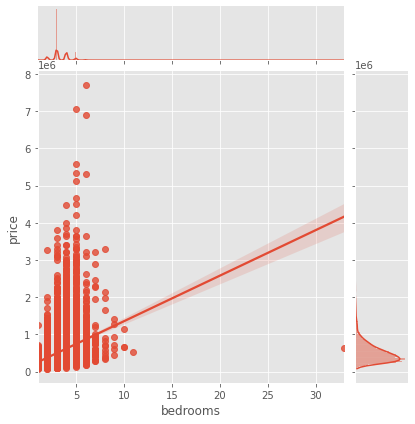

In [146]:
sns.jointplot(x='bedrooms',y='price', data=hddf, kind='reg');

In [ ]:
Observation: A Big outlier of 30+ bedrooms. Note: we should remove the outlier. 

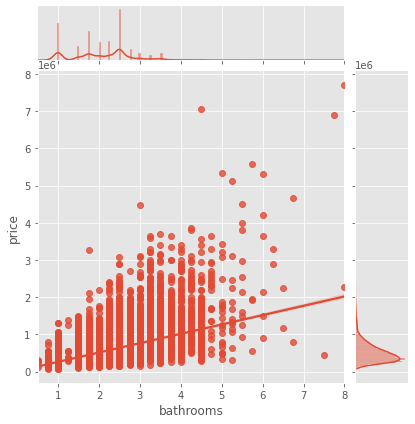

In [145]:
sns.jointplot(x='bathrooms',y='price', data=hddf, kind='reg');

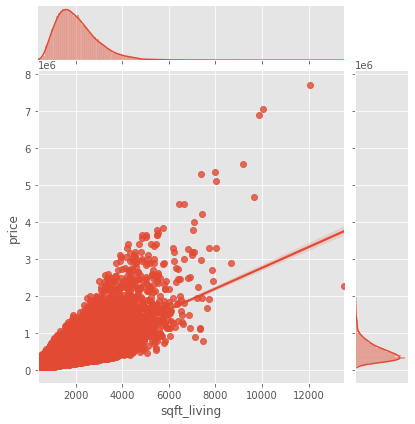

In [147]:
sns.jointplot(x='sqft_living',y='price', data=hddf, kind='reg');

Is linear? not truly but somewhat

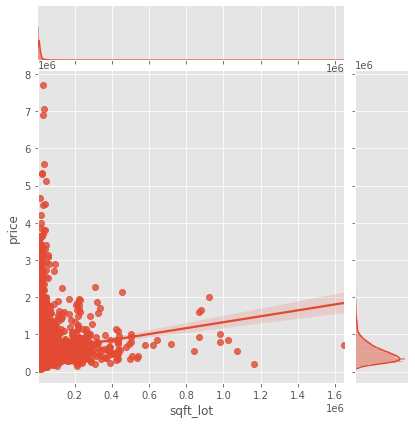

In [148]:
sns.jointplot(x='sqft_lot',y='price', data=hddf, kind='reg');

not linear

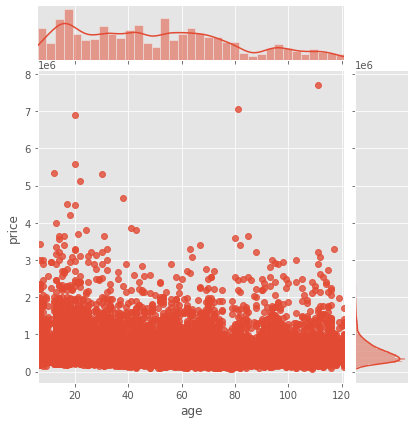

In [149]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

In [ ]:
not linear

## Check for multicolinearity in features

In [152]:
corr = hddf[feats_df].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.155670,0.026496,0.356563
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.507173,-0.126479,0.665838
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.318152,-0.059445,0.762779
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.052946,-0.008830,0.114731
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.489193,-0.264075,0.458794
age,-0.155670,-0.507173,-0.318152,-0.052946,-0.489193,1.000000,0.361592,-0.447865
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.361592,1.000000,-0.146896
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.447865,-0.146896,1.000000


In [153]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

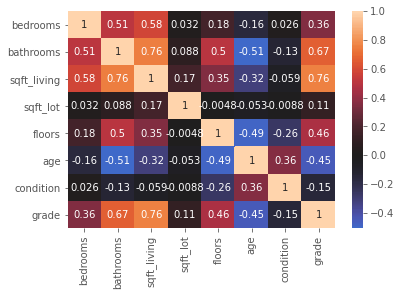

In [154]:
sns.heatmap(corr, center=0, annot=True);